<a href="https://colab.research.google.com/github/Elhai12/SBA_loans_predict/blob/main/Model_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Clone git to get the files
!git clone https://github.com/Elhai12/SBA_loans_predict.git

Cloning into 'SBA_loans_predict'...
remote: Enumerating objects: 191, done.
remote: Counting objects: 100% (78/78), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 191 (delta 58), reused 24 (delta 24), pack-reused 113 (from 1)
Receiving objects: 100% (191/191), 32.24 MiB | 14.97 MiB/s, done.
Resolving deltas: 100% (89/89), done.


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import re
warnings.filterwarnings('ignore')
import time
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.subplots as sp
from scipy.stats import mannwhitneyu,chisquare,chi2_contingency
import plotly.express as px
from SBA_loans_predict import Functions_for_EDA
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from sklearn.linear_model import Lasso, Ridge
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import f1_score,roc_auc_score,r2_score,accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [3]:
df_for_models = pd.read_pickle('/content/SBA_loans_predict/data_files/data_after_feat_eng.pkl')

In [11]:
#Create function for show the performance of the models
def performance_model(y,y_pred):
  auc = roc_auc_score(y,y_pred)
  print(f'AUC: {auc}')
  f1 = f1_score(y,y_pred)
  print(f'F1 Score: {f1}')
  accuracy = accuracy_score(y,y_pred)
  print(f'Accuracy: {accuracy}')
  report = classification_report(y,y_pred)
  print(report)

  conf_matrix = confusion_matrix(y,y_pred)
  cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [1,0])
  cm_display.plot()
  plt.show()
  return auc,f1,accuracy



In [5]:
#Check Imbalanced
df_counts = pd.DataFrame(df_for_models['MIS_Status'].value_counts())
df_counts['prc'] = round(df_counts['count']/df_counts['count'].sum(),3)
df_counts

,count,prc
MIS_Status,,
1,29938,0.726
0,11274,0.274


In [9]:
#Define X and y and split for train and test
X = df_for_models.drop('MIS_Status',axis=1)
y = df_for_models['MIS_Status']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

****************************** Model: SVC ******************************
AUC: 0.7261999309865095
F1 Score: 0.8867273297772199
Accuracy: 0.8248210602935825
              precision    recall  f1-score   support

           0       0.77      0.51      0.61      2257
           1       0.84      0.94      0.89      5986

    accuracy                           0.82      8243
   macro avg       0.81      0.73      0.75      8243
weighted avg       0.82      0.82      0.81      8243



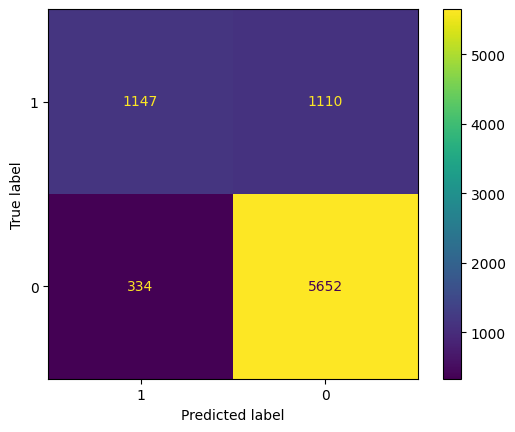

******************************************************************************************
****************************** Model: Logistic ******************************
AUC: 0.7421684787765753
F1 Score: 0.8904878627342453
Accuracy: 0.8319786485502851
              precision    recall  f1-score   support

           0       0.78      0.54      0.64      2257
           1       0.85      0.94      0.89      5986

    accuracy                           0.83      8243
   macro avg       0.81      0.74      0.76      8243
weighted avg       0.83      0.83      0.82      8243



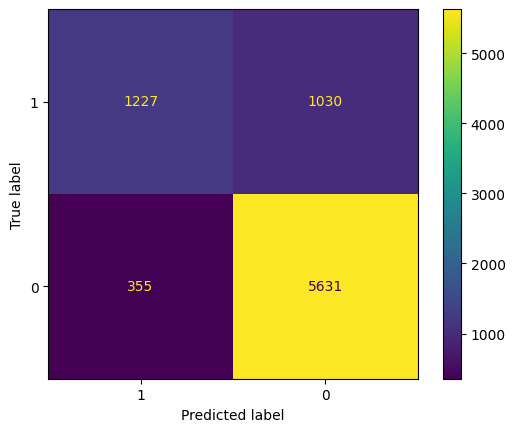

******************************************************************************************
****************************** Model: RandomForest ******************************
AUC: 0.8937042361877907
F1 Score: 0.9493952110589978
Accuracy: 0.9253912410530146
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      2257
           1       0.94      0.96      0.95      5986

    accuracy                           0.93      8243
   macro avg       0.92      0.89      0.90      8243
weighted avg       0.92      0.93      0.92      8243



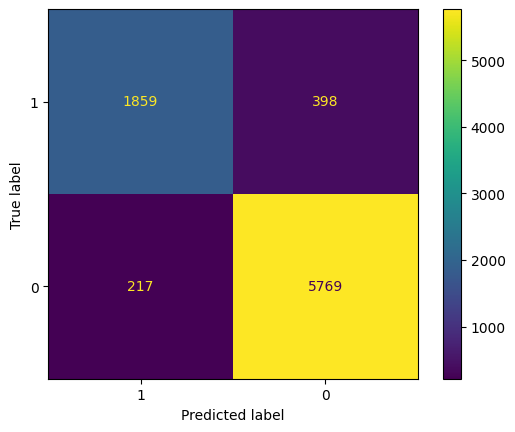

******************************************************************************************
****************************** Model: GradientBoost ******************************
AUC: 0.9002013411592046
F1 Score: 0.9503804168044988
Accuracy: 0.9272109668809899
              precision    recall  f1-score   support

           0       0.89      0.84      0.86      2257
           1       0.94      0.96      0.95      5986

    accuracy                           0.93      8243
   macro avg       0.91      0.90      0.91      8243
weighted avg       0.93      0.93      0.93      8243



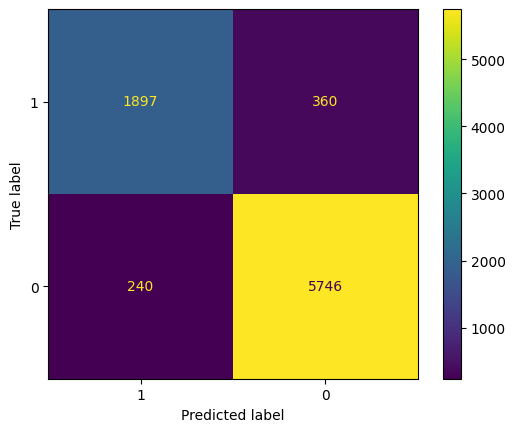

******************************************************************************************
****************************** Model: XGB ******************************
AUC: 0.9143286039897259
F1 Score: 0.9559873775120412
Accuracy: 0.9357030207448744
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      2257
           1       0.95      0.96      0.96      5986

    accuracy                           0.94      8243
   macro avg       0.92      0.91      0.92      8243
weighted avg       0.94      0.94      0.94      8243



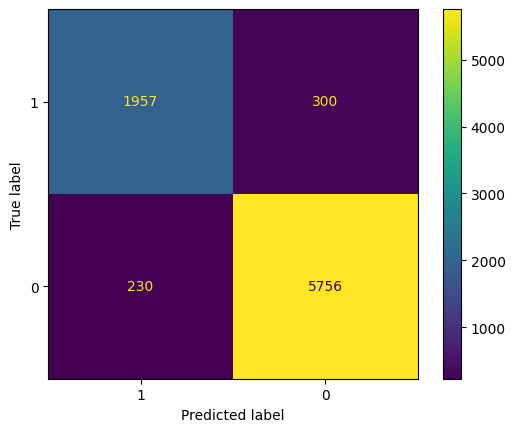

******************************************************************************************


In [12]:
#Create dictionary of the models
models_dict = {'SVC':LinearSVC(random_state=42),
               'Logistic':LogisticRegression(random_state=42),
               'RandomForest':RandomForestClassifier(random_state=42),
               'GradientBoost':GradientBoostingClassifier(random_state=42),
               'XGB':xgb.XGBClassifier(random_state=42)
               }
dict_results = {}

#Loop for show the result for each model and save to dictionary for create df
for model_name,model in models_dict.items():
  print("***"*10,f'Model: {model_name}',"***"*10)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  auc,f1,acc = performance_model(y_test,y_pred)
  dict_results[model_name]={"AUC":auc,"F1":f1,"Accuracy":acc}
  print("***"*30)


In [14]:
#Create df of the main results
df_results = pd.DataFrame(dict_results).T
#I chhose highlite the AUC column because this is indicate for the all tresholds, but f1 and accuracy is define by defualt treshold of 0.5
df_results_color = Functions_for_EDA.highlight_max_in_columns(df_results,'AUC',"green")
df_results_color

,AUC,F1,Accuracy
SVC,0.726200,0.886727,0.824821
Logistic,0.742168,0.890488,0.831979
RandomForest,0.893704,0.949395,0.925391
GradientBoost,0.900201,0.950380,0.927211
XGB,0.914329,0.955987,0.935703
